### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** Beijia Rebecca Lai <br>
**Student ID(s):** 1133768



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from statistics import NormalDist

In [2]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(filepath):
    df = pd.read_csv(filepath)
    return train_test_split(df, test_size=0.1, shuffle=False)

In [3]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model
def train(df, ignore_missing):
    prior_probs = {}
    conditional_dists = {}

    nominal_atts = df.select_dtypes(exclude=np.number)
    numeric_atts = df.select_dtypes(include=np.number)

    for label, label_df in df.groupby('label'):
        prior_probs[label] = len(label_df) / len(df)

        for att in nominal_atts:
            att_counter = Counter(label_df[att])
            if ignore_missing and ' ?' in att_counter:
                del att_counter[' ?']
            conditional_dists[(att, label)] = {x: att_counter[x] / len(label_df) for x in att_counter}
        
        for att in numeric_atts:
            mean = label_df[att].mean()
            std = label_df[att].std()
            conditional_dists[(att, label)] = lambda x: NormalDist(mean, std).pdf(x)

    return prior_probs, conditional_dists

In [4]:
# This function should predict classes for new items in the testing data
def predict(X, labels, prior_probs, conditional_dists):
    pred_prob = []
    y_pred = []
    
    nominal_atts = X.select_dtypes(exclude=np.number)
    numeric_atts = X.select_dtypes(include=np.number)
    
    for r, instance in X.iterrows():
        label_probs = []
        for label in labels:
            label_prob = np.log(prior_probs[label])

            for att in nominal_atts:
                if instance[att] in conditional_dists[(att, label)]:
                    label_prob += np.log(conditional_dists[(att, label)][instance[att]])
                else:
                    label_prob += np.log(1e-5)
                
            for att in numeric_atts:
                label_prob += np.log(conditional_dists[(att, label)](instance[att]))

            label_probs.append(label_prob)

        pred_prob.append(max(label_probs))
        max_index = np.argmax(label_probs)
        y_pred.append(labels[max_index])
        
    return pred_prob, y_pred

In [5]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.
def evaluate(labels, y, y_bar):
    tp, fn, fp, tn = confusion_matrix(y, y_bar, labels=labels).ravel()
    # print confusion matrix
    matrix = np.array([[tp, fn], [fp, tn]])
    accuracy = (tp + tn) / sum([tp, fn, fp, tn])
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    return tp, fn, fp, tn, matrix, accuracy, f1_score

In [6]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]

# First, read in the data and apply your NB model to the ADULT data
labels = [' <=50K', ' >50K']
train_df, test_df = preprocess("dataset/adult.csv")
prior_probs, conditional_dists = train(train_df, ignore_missing=False)

X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
pred_prob, y_pred = predict(X_test, labels, prior_probs, conditional_dists)

# Second, print the full evaluation results from the evaluate() function
tp, fn, fp, tn, matrix, accuracy, f1_score = evaluate(labels, y_test, y_pred)
print("Confusion matrix: \n", matrix)
print("Accuracy: ", accuracy)
print("F1 score", f1_score)

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)

print("\nAttribute vectors of instances [0, 1, 2]: ") # of the first three records in adult.csv
for i in range(3):
    print(train_df.iloc[i,:-1].values)

print("\nNumber of instances (N): ", len(train_df) + len(test_df))
print("Number of attributes (F): ", len(X_test.iloc[0]))
print("Number of labels (L): ", len(labels))

# print out the prediction results of the last three instances
print("\n\nPredicted class log-probabilities for instance N-3: ", pred_prob[-3])
print("Predicted class ID for instance N-3: ", y_pred[-3])
print("\nPredicted class log-probabilities for instance N-2: ", pred_prob[-2])
print("Predicted class ID for instance N-2: ", y_pred[-2])
print("\nPredicted class log-probabilities for instance N-1: ", pred_prob[-1])
print("Predicted class ID for instance N-1: ", y_pred[-1])


Confusion matrix: 
 [[63 14]
 [ 5 18]]
Accuracy:  0.81
F1 score 0.8689655172413794

Attribute vectors of instances [0, 1, 2]: 
[68 ' ?' ' 1st-4th' 2 ' Divorced' ' ?' ' Not-in-family' ' White' ' Female'
 20 ' United-States']
[39 ' State-gov' ' Bachelors' 13 ' Never-married' ' Adm-clerical'
 ' Not-in-family' ' White' ' Male' 40 ' United-States']
[50 ' Self-emp-not-inc' ' Bachelors' 13 ' Married-civ-spouse'
 ' Exec-managerial' ' Husband' ' White' ' Male' 13 ' United-States']

Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2


Predicted class log-probabilities for instance N-3:  -24.39561589571836
Predicted class ID for instance N-3:   <=50K

Predicted class log-probabilities for instance N-2:  -29.037708296798996
Predicted class ID for instance N-2:   >50K

Predicted class log-probabilities for instance N-1:  -24.01142860572966
Predicted class ID for instance N-1:   >50K


## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [7]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity, specificity)

0.8181818181818182 0.782608695652174


Provide your text answer of 150-200 words in this cell.
Sensitivity is the proportion of true positive <=50K instances the model detected; on the other hand, specificity is the proportion of true negative >50K instances the model detected. The difference is that sensitivity is greater than specificity, this could be due to having more <=50K instances than >50K instances in the training dataset. To improve the model performance, we can to construct a more balanced training dataset or sample weights or data augmentation ...

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [9]:
# implement kde for numeric attributes


# implement m-fold cross validation
def cross_validate(df, m):
    splits = np.array_split(df, m)
    cv_results = []
    for i in range(m):
        # train
        train_df = pd.concat(splits[:i] + splits[i+1:])
        prior_probs, conditional_dists = train(train_df, ignore_missing=False)

        # test
        test_df = splits[i]
        X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
        _, y_pred = predict(X_test, labels, prior_probs, conditional_dists)

        # evaluate
        tp, fn, fp, tn, _, accuracy, _ = evaluate(labels, y_test, y_pred)
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        cv_results.append((accuracy, sensitivity, specificity))
    return np.mean(cv_results, axis=0)

df = pd.read_csv("dataset/adult.csv")
cv10_result = cross_validate(df, 10)
print("10-Fold CV: Accuracy: {}, Sensitivity: {}, Specificity: {}".format(cv10_result[0], cv10_result[1], cv10_result[2]))
cv2_result = cross_validate(df, 2)
print("2-Fold CV: Accuracy: {}, Sensitivity: {}, Specificity: {}".format(cv2_result[0], cv2_result[1], cv2_result[2]))

10-Fold CV: Accuracy: 0.789, Sensitivity: 0.8191564677090193, Specificity: 0.6926109856327247
2-Fold CV: Accuracy: 0.798, Sensitivity: 0.8350041262497125, Specificity: 0.6767661616919154


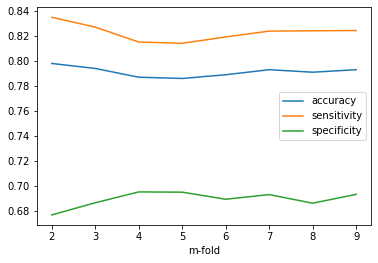

In [11]:
results = []
ms = range(2,10)
for m in ms:
    results.append(cross_validate(df, m))

results = np.array(results)
plt.xlabel('m-fold')
plt.plot(ms, results[:,0], label="accuracy")
plt.plot(ms, results[:,1], label="sensitivity")
plt.plot(ms, results[:,2], label="specificity")
plt.legend()
plt.show()

Provide your text answer of 150-200 words in this cell.

(a) Judging from their distributions, KDE should fit all numerical data better; however, the choice of band width is important.
(not verified) KDE may lead to overfitting (generalise less well on new/test data).

(b) From the graph above, we observe that as the value of m increases, the average accuracy of the m-fold cross validation slightly decreases. Since more folds means a larger training dataset and a smaller testing dataset in each iteration, we expect the the average accuracy to be less biased and closer to the true accuracy which could mean an increase or decrease depending on the dataset and the model applied. Since more folds means more iterations, we also expect the function to take longer to execute.

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

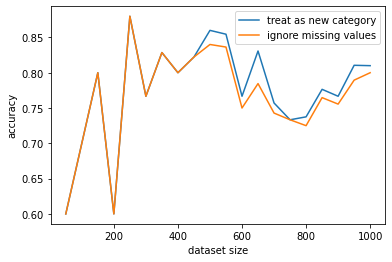

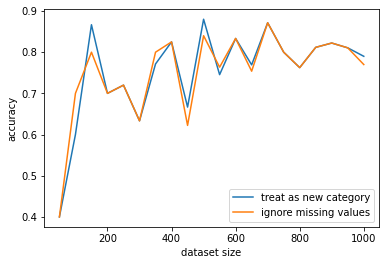

In [14]:
# compare the methods in different size datasets
def train_test_evaluate(df, df_size):
    sub_df = df.iloc[:df_size,:]
    train_df, test_df = train_test_split(sub_df, test_size=0.1, shuffle=False)
    # method 1 = treat as new category vs method 2 = ignore missing values
    results = []
    for ignore_missing in [False, True]:
        prior_probs, conditional_dists = train(train_df, ignore_missing)
        X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
        _, y_pred = predict(X_test, labels, prior_probs, conditional_dists)
        _, _, _, _, _, accuracy, _ = evaluate(labels, y_test, y_pred)
        results.append(accuracy)
    return results

sizes = range(50, 1001, 50)
df = pd.read_csv('dataset/adult.csv')
for s_df in [df, df.sample(frac=1)]:
    results = []
    for df_size in sizes:
        results.append(train_test_evaluate(s_df, df_size))
    results = np.array(results)
    plt.xlabel("dataset size")
    plt.ylabel("accuracy")
    plt.plot(sizes, results[:,0], label="treat as new category")
    plt.plot(sizes, results[:,1], label="ignore missing values")
    plt.legend()
    plt.show()


Provide your text answer of 150-200 words in this cell.
Let method1 = treat as new category and method2 = ignore missing values. From the first graph, there appears to be not much difference between method1 and method2 in smaller datasets with <500 instances, but method1 performs better compared to method2 in larger datasets with >=500 instances. The better performance can be due to the nominal attributes missing not at random, in other words, method1 uses the informative missing data to further improve its model. However, we cannot explain its relationship with the dataset size. After further investigation, we found out that this is simply caused by the order of instances in the original dataset. After shuffling the dataset, model1 outperforms model2 consistently over different dataset sizes.

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class distribution. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [ ]:
# Write additional code here, if necessary (you may insert additional code cells)

### (a)

In [45]:
# information gain and gain ratio
def info_gain_gain_ratio(df, attribute1, attribute2):    
    # entropy before splitting
    probs_before = df[attribute2].value_counts(normalize=True)
    entropy_before = -1 * np.sum(probs_before * np.log2(probs_before))

    # mean info and split info
    mean_info = 0
    split_info = 0
    for x, x_df in df.groupby(attribute1):
        x_weight = len(x_df) / len(df)
        x_probs = x_df[attribute2].value_counts(normalize=True)
        x_entropy = -1 * np.sum(x_probs * np.log2(x_probs))
        mean_info += x_weight * x_entropy
        split_info += -1 * x_weight * np.log2(x_weight)

    info_gain = entropy_before - mean_info
    gain_ratio = info_gain / split_info
    return info_gain, gain_ratio

In [46]:
gain_ratios = []
attributes = df.columns[:-1]
for attribute in attributes:
    ig, gr = info_gain_gain_ratio(df, attribute, 'label')
    gain_ratios.append((gr, attribute))
gain_ratios.sort()
gain_ratios

[(0.018141905518298508, 'work class'),
 (0.020525140518530615, 'race'),
 (0.026697660320668348, 'age'),
 (0.02698113630934037, 'sex'),
 (0.029488131640638304, 'hours per week'),
 (0.029539199872951637, 'occupation'),
 (0.03746449095021427, 'native country (region)'),
 (0.0390446720426429, 'education'),
 (0.0390446720426429, 'education num'),
 (0.07052569835807494, 'relationship'),
 (0.08326589111992261, 'marital status')]

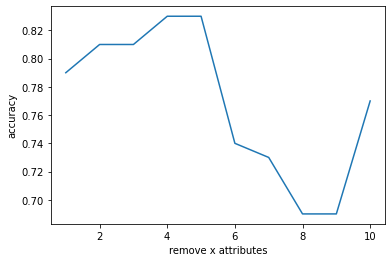

In [17]:
# remove less important attributes
results = []
partial_df = df.copy()
for gr, attribute in gain_ratios[:-1]:
    del partial_df[attribute]
    train_df, test_df = train_test_split(partial_df, test_size=0.1, shuffle=False)
    prior_probs, conditional_dists = train(train_df, ignore_missing=False)
    X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
    pred_prob, y_pred = predict(X_test, labels, prior_probs, conditional_dists)
    _, _, _, _, _, accuracy, _ = evaluate(labels, y_test, y_pred)
    results.append(accuracy)

plt.xlabel("remove x attributes")
plt.ylabel("accuracy")
plt.plot(range(1,len(results)+1), results)
plt.show()

# do this for both gaussian and kde

Provide your text answer to **Question 4.a** of 100-150 words in this cell.

### (b)

In [56]:
# information gain between each pair of attributes 
info_gains = []
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        ig, gr = info_gain_gain_ratio(df, attributes[i], attributes[j])
        info_gains.append((ig, attributes[i], attributes[j]))
info_gains

[(0.3208577909382493, 'age', 'work class'),
 (0.6976603667056698, 'age', 'education'),
 (0.6976603667056698, 'age', 'education num'),
 (0.5562916882399072, 'age', 'marital status'),
 (0.6628604121728578, 'age', 'occupation'),
 (0.5267100911857161, 'age', 'relationship'),
 (0.13793741529407733, 'age', 'race'),
 (0.07094350958717921, 'age', 'sex'),
 (1.0617485209881812, 'age', 'hours per week'),
 (0.3113355901788186, 'age', 'native country (region)'),
 (0.10017431071711824, 'work class', 'education'),
 (0.10017431071711824, 'work class', 'education num'),
 (0.06267752955234696, 'work class', 'marital status'),
 (0.5238434727741756, 'work class', 'occupation'),
 (0.05873554582143026, 'work class', 'relationship'),
 (0.03237907649172678, 'work class', 'race'),
 (0.018738300868037183, 'work class', 'sex'),
 (0.2142131966205314, 'work class', 'hours per week'),
 (0.07324899775938154, 'work class', 'native country (region)'),
 (2.9130582577101425, 'education', 'education num'),
 (0.0864078560

In [55]:
# gain ratio between an attribute and eduation num
gain_ratios = []
for attribute in attributes:
    if attribute != 'education num':
        ig, gr = info_gain_gain_ratio(df, attribute, 'education num')
        gain_ratios.append((gr, attribute))
gain_ratios.sort()
gain_ratios

[(0.014983078887458964, 'sex'),
 (0.04668697275389565, 'marital status'),
 (0.04779762947302531, 'relationship'),
 (0.06173357013188234, 'work class'),
 (0.06409535117801583, 'race'),
 (0.11271031651360232, 'hours per week'),
 (0.12380387665001123, 'age'),
 (0.1403103754368669, 'occupation'),
 (0.22706160698022998, 'native country (region)'),
 (1.0, 'education')]

In [ ]:
# choose native country to implement estimator

Provide your text answer to **Question 4.b** of 150-200 words in this cell.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Beijia Rebecca Lai 1133768
   
   <b>Dated</b>: 30/03/2022